In [ ]:

import numpy as np 
import pandas as pd
import pytz as tz
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/con/gowalla.txt', sep='\t', header=None) # !need to upload dataset on gdrive because it is 350 mb file , if you upload directly here it will take small paer of file
df.columns = ['user','timestamp','latitude','longitude','location_id']
df.head()

,user,timestamp,latitude,longitude,location_id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [ ]:
dataOrig=df.copy()

In [ ]:
data=df.copy()

In [ ]:
# Get the top 100 users by number of check-ins
top_users = data['user'].value_counts().head(100).index.tolist()

# Select the data for the top 100 users
data_top100 = data[data['user'].isin(top_users)]


In [ ]:
datar1=data_top100
res1=data
res2=data_top100

In [ ]:
res2.shape

(192855, 5)

In [ ]:
data_top100.shape

(192855, 5)

In [ ]:
data=data_top100

In [ ]:
# filter users with at least 10 check-in records
user_counts = data['user'].value_counts()
valid_users = user_counts[user_counts >= 10].index.tolist()
df = data_top100[data_top100['user'].isin(valid_users)]

In [ ]:
# filter locations visited at least twice
location_counts = df['location_id'].value_counts()
valid_locations = location_counts[location_counts >= 2].index.tolist()
df = df[df['location_id'].isin(valid_locations)]

In [ ]:
data1=df.copy()
data2=df.copy()

In [ ]:
data1.shape

(112422, 5)

In [ ]:
data2['timestamp'] = pd.to_datetime(data2['timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

In [ ]:
# Convert timestamp to Unix timestamp format
data2['timestamp'] = pd.to_datetime(data2['timestamp'])
data2['timestamp'] = data2['timestamp'].apply(lambda x: int(x.timestamp()))

In [ ]:
data2.head()


,user,timestamp,latitude,longitude,location_id
237,2,1287619430,34.043023,-118.267157,14637
238,2,1287595139,34.017273,-118.447509,59838
239,2,1287158409,34.017273,-118.447509,59838
240,2,1286847337,34.017273,-118.447509,59838
242,2,1286478889,34.030827,-118.468698,335197


In [ ]:

import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from surprise import Dataset, Reader, KNNBasic, KNNWithMeans, SVD, model_selection


In [ ]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score



In [ ]:
start_train_date = datetime.datetime(2009, 11, 1)
end_train_date = datetime.datetime(2010, 5, 31)
start_test_date = datetime.datetime(2010, 6, 1)
end_test_date = datetime.datetime(2010, 10, 31)

# initialize weights for R1 and R2
w1 = {}
w2 = {}
# Set learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000
# loop through each month and update weights
current_date = start_train_date

In [ ]:
iso_format = current_date.strftime('%Y-%m-%dT%H:%M:%SZ')

    # Convert start_train_date to Unix timestamp format
unix_timestamp = int(current_date.timestamp())
data_train1 = data1[data1['timestamp'] < iso_format]
data_train2 = data2[data2['timestamp'] < unix_timestamp]

In [ ]:
data_train2

,user,timestamp,latitude,longitude,location_id
5873,22,1256866530,40.726627,-74.003157,62578
5874,22,1256866521,40.726627,-74.003157,62578
5875,22,1256866506,40.725325,-74.004298,46348
5878,22,1256843717,40.755035,-73.988092,58793
5883,22,1256843645,40.755653,-73.985753,54888
...,...,...,...,...,...
1076552,4893,1256388847,39.052960,-94.591275,52769
1076553,4893,1256388839,39.053146,-94.591148,9838
1076554,4893,1256388831,39.041449,-94.594828,570702
1076555,4893,1256388816,39.052792,-94.591405,9068


In [ ]:
user_counts1 = data_train1.groupby(['user']).size().reset_index(name='count')
user_counts1

,user,count
0,22,255
1,350,426
2,401,348
3,472,36
4,491,553
5,576,745
6,976,216
7,1108,42
8,4883,47
9,4893,205


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

def recommender_UCF(user_id, data_input,n=10):
    # Load Gowalla dataset
    data = data_input
    # print(data_train1[data_train1['user'] == 22])
    # Create user-item matrix
    matrix = pd.crosstab(index=data['user'], columns=data['location_id'])

    # Compute cosine similarity between users
    similarities = pd.DataFrame(1 - np.array([cosine(matrix.loc[user_id], matrix.loc[user]) for user in matrix.index]), index=matrix.index, columns=['similarity'])

    # Sort users by similarity and select top n users
    top_users = similarities.sort_values(by='similarity', ascending=False)[:n]

    # Get list of locations for top users
    top_locations = matrix.loc[top_users.index].sum().sort_values(ascending=False)

    # Remove locations already visited by user_id
    recs = [loc for loc in top_locations.index if loc not in data[data['user'] == user_id]['location_id'].values][:n]

    return recs


In [ ]:
import pandas as pd
from scipy.spatial.distance import cdist
def recommender_2Sp(n,data_input):
  # Load Gowalla dataset
  data = data_input

  # Get a list of unique users and locations
  users = data['user'].unique()
  locations = data['location_id'].unique()

  # Create a dictionary of user locations
  user_locs = {}
  for user in users:
      user_locs[user] = data[data['user'] == user][['latitude', 'longitude']].values

  # Compute the maximum geographical distance for each user
  max_dists = {}
  for user in users:
      user_locs_list = user_locs[user]
      dists = cdist(user_locs_list, user_locs_list, metric='euclidean')
      max_dists[user] = dists.max(axis=1)

  # Compute the weights for each user location pair
  weights = {}
  for user in users:
      user_locs_list = user_locs[user]
      for loc in locations:
          if loc in data[data['user'] == user]['location_id'].values:
              loc_index = data[data['location_id'] == loc].index[0]
              loc_lat = data.loc[loc_index, 'latitude']
              loc_lon = data.loc[loc_index, 'longitude']
              dists = cdist(user_locs_list, [[loc_lat, loc_lon]], metric='euclidean')
              weights[(user, loc)] = 1 - (dists / max_dists[user]).min()

  # Recommend locations for each user
  # n = 10  # number of recommendations
  recs = {}
  for user in users:
      user_recs = []
      for loc in locations:
          if loc not in data[data['user'] == user]['location_id'].values:
              score = 0
              for loc_visited in data[data['user'] == user]['location_id'].values:
                  if (user, loc_visited) in weights and (loc_visited, loc) in weights:
                      score += weights[(user, loc_visited)] * weights[(loc_visited, loc)]
              user_recs.append((loc, score))
      user_recs.sort(key=lambda x: x[1], reverse=True)
      recs[user] = [x[0] for x in user_recs[:n]]
  # if user_id in recs:
    # return recs[]
  # return []
  return recs


In [ ]:
bb=recommender_UCF(22,data_train1)

In [ ]:
aa=recommender_2Sp(10,data_train1)

In [ ]:
bb


[17208, 27376, 18680, 12595, 19409, 9568, 33025, 14483, 8964, 18925]

In [ ]:
aa

{22: [72530, 21134, 32159, 17208, 32282, 15655, 65576, 17716, 10475, 10416],
 350: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 401: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 472: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 491: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 576: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 976: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 1108: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 4883: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764],
 4893: [62578, 46348, 58793, 54888, 12633, 38142, 48001, 16812, 46409, 57764]}

In [ ]:
data_train1['user'].unique()


array([  22,  350,  401,  472,  491,  576,  976, 1108, 4883, 4893])

In [ ]:
data_train1.dtypes

user             int64
timestamp       object
latitude       float64
longitude      float64
location_id      int64
dtype: object

In [ ]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score


# define start and end dates for training and testing periods
start_train_date = datetime.datetime(2009, 11, 1)
end_train_date = datetime.datetime(2010, 5, 31)
start_test_date = datetime.datetime(2010, 6, 1)
end_test_date = datetime.datetime(2010, 10, 31)
# Initialize the weights
users = data_top100['user'].unique()
weights = np.array([1/2, 1/2])
weight_R1 = 1/2
weight_R2 = 1/2

# Initialize the user weights
user_weights = {}
for user in users:
    user_weights[user] = {'weight_R1': 0.5, 'weight_R2': 0.5}


# Set learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000
# loop through each month and update weights
current_date = start_train_date
p1={}
p2={}
while current_date <= end_train_date:
    # select data up to current month
    # Convert start_train_date to the ISO 8601 format
    iso_format = current_date.strftime('%Y-%m-%dT%H:%M:%SZ')

    # Convert start_train_date to Unix timestamp format
    unix_timestamp = int(current_date.timestamp())
    data_train1 = data1[data1['timestamp'] < iso_format]
    # data_train2 = data2[data2['timestamp'] < unix_timestamp]
    
    data_train1.head()
    # predict places for next month using R1 and R2
    next_month = current_date + pd.DateOffset(months=1)
    iso_formatNextMonth = current_date.strftime('%Y-%m-%dT%H:%M:%SZ')
    
   
    
    pred_r1=recommender_2Sp(10,data_train1)
  
    for user in pred_r1:
        if user not in pred_r1:
         continue
        if user not in data_train1['user'].unique():
         continue   
        if user not in data_train2['user'].unique():
         continue
        print(f"user {user} is date {current_date} jj" )
       
        pred_r2=recommender_UCF(user,data_train1)
       
        if user in pred_r1:
         p1[user] = pred_r1
        if pred_r2:
         p2[user] = pred_r2
    

        user_data = data_top100[(data_top100['user'] == user) & (data_top100['timestamp'] > iso_format)]
        user_actual = set(user_data['location_id'])
        print("actual places visited")
        print(user_actual)

        user_pred_r1 = set(pred_r1[user])
        tp_r1 = len(user_pred_r1.intersection(user_actual))
        per1=tp_r1/10;

        user_pred_r2 = set(pred_r2)
        tp_r2 = len(user_pred_r2.intersection(user_actual))
        per2=tp_r2/10
        # calculate weights based on accuracy and recall  Compute the predicted weights
        print(f"tpr1={tp_r1} Accuracy= {per1} tp_r2= {tp_r2} accuracy-{per2} for user{user} LL")
        predicted_weights = np.array([per1, per2])
        
            
        
        gradient1 = per1-per2
        gradient2 = per2-per1
        # print(f'grd {gradient} check' )   
        # Update the weights with the gradient
        # weights -= learning_rate * gradient
        # user_weights_dict = user_weights.get(user)
        # # print('start')
        # print(user_weights_dict)
        # weight_R1 = user_weights_dict[0]
        # weight_R1 = user_weights_dict[1]
        # print('end')
        
        user_weights_dict = user_weights[user]
        weight_R1 = user_weights_dict['weight_R1']
        weight_R2 = user_weights_dict['weight_R2']
        weight_R1 +=  gradient1
        weight_R2 +=   gradient2

        # user_weights[user] = { weight_R1, weight_R2}
        user_weights[user] = {'weight_R1': weight_R1, 'weight_R2': weight_R2}
        print(f"wtr1={weight_R1} wtr2={weight_R2} for user{user}ll")
    # move to next month
    print('end of current date')
    current_date = next_month


user 22 is date 2009-11-01 00:00:00 jj
actual places visited
{245760, 155650, 245762, 245767, 155658, 434194, 704531, 507924, 41000, 393262, 163887, 286778, 98364, 24637, 122954, 458830, 221262, 409694, 122974, 606305, 278635, 24683, 139375, 98423, 172161, 73858, 155779, 73864, 303248, 57488, 442514, 1015957, 467094, 49307, 123039, 245927, 270506, 458923, 204981, 123063, 598200, 106690, 1245384, 286922, 164072, 573680, 155900, 303363, 631060, 286998, 49436, 155967, 655680, 303425, 524611, 713028, 155971, 295247, 180567, 106840, 1270104, 172381, 90469, 57703, 57706, 360822, 352635, 24963, 197000, 1155482, 16802, 16803, 893348, 41404, 541118, 418242, 590289, 74195, 90581, 66010, 434656, 147947, 172532, 549368, 246266, 377343, 49675, 459276, 57871, 360979, 254485, 16919, 66071, 590361, 303653, 148006, 279079, 401970, 107060, 49718, 721470, 49729, 148049, 33366, 49758, 90719, 57955, 148085, 377462, 492151, 1147519, 172672, 139917, 475790, 197274, 17051, 148130, 328355, 492223, 434885, 2874

In [ ]:
user4893=user_weights[4893]

In [ ]:
user4893

{'weight_R1': 0.19999999999999998, 'weight_R2': 0.7999999999999999}

In [ ]:
wtR1=user4893['weight_R1']
wtR2=user4893['weight_R2']

In [ ]:
if(wtR1<0.5):
  wtR1=0.5-wtR1
  wtR1=wtR1*10
  wtR1=int(wtR1)
  wtR2=10-wtR1
else :
  wtR2=0.5-wtR2
  wtR2=wtR2*10
  wtR2=int(wtR2)
  wtR1=10-wtR2
  

In [ ]:
wtR1=3;
wtR1=7

In [ ]:
start_test_date = datetime.datetime(2010, 5, 1)
end_test_date = datetime.datetime(2010, 6, 30)
iso_format_s = start_test_date.strftime('%Y-%m-%dT%H:%M:%SZ')
iso_format_e = end_test_date.strftime('%Y-%m-%dT%H:%M:%SZ')

    # Convert start_train_date to Unix timestamp format

data_train_test = data1[(data1['timestamp'] > iso_format_s) & (data1['timestamp'] < iso_format_e) ]


In [ ]:
recom1=recommender_UCF(4893,data_train_test)
recom2=recommender_2Sp(10,data_train_test)



<ipython-input-25-50ca273914e9>:33: RuntimeWarning: invalid value encountered in true_divide
  weights[(user, loc)] = 1 - (dists / max_dists[user]).min()


In [ ]:
recom1

[58039, 60708, 108774, 994196, 247853, 265954, 33189, 820628, 557122, 12821]

In [ ]:
recom2[4893]

[12506, 12821, 210577, 506344, 294127, 23261, 12551, 222001, 202735, 512508]

In [ ]:
recom_1=recom1

In [ ]:
recom_2=recom2[4893]

In [ ]:
user_data = data_top100[(data_top100['user'] == 4893)& (data1['timestamp'] > iso_format_e)  ]
user_actual = set(user_data['location_id'])


In [ ]:
user_actual

set()

In [ ]:



locations1 = []
for i in range(wtR1):
    locations1.append(recom_1[i])

for i in range(wtR2):
    locations1.append(recom_2[i])


In [ ]:
user_pred_r1 = set(locations1)
tp_r1 = len(user_pred_r1.intersection(user_actual))## see how many actually visited

In [ ]:
tp_r1

0

In [ ]:
# for recomender1 on only
user_pred_recom1 = set(recom_1)
tp_recom1 = len(user_pred_recom1.intersection(user_actual))# see how many actually visited for rec1

In [ ]:
tp_recom1

0

In [ ]:
# for recomender2 on only
user_pred_recom2 = set(recom_2)
tp_recom2 = len(user_pred_recom1.intersection(user_actual)) # see how many actually visited for rec2

In [ ]:
tp_recom1

0

In [ ]:
user_weights

{2: {'weight_R1': 0.5, 'weight_R2': 0.5},
 22: {'weight_R1': 0.4, 'weight_R2': 0.6},
 53: {'weight_R1': 0.5, 'weight_R2': 0.5},
 241: {'weight_R1': 0.5, 'weight_R2': 0.5},
 337: {'weight_R1': 0.5, 'weight_R2': 0.5},
 346: {'weight_R1': 0.5, 'weight_R2': 0.5},
 350: {'weight_R1': 0.5, 'weight_R2': 0.5},
 401: {'weight_R1': -0.1, 'weight_R2': 1.1},
 443: {'weight_R1': 0.5, 'weight_R2': 0.5},
 472: {'weight_R1': 0.4, 'weight_R2': 0.6},
 491: {'weight_R1': 0.30000000000000004, 'weight_R2': 0.7},
 551: {'weight_R1': 0.5, 'weight_R2': 0.5},
 576: {'weight_R1': 0.5, 'weight_R2': 0.5},
 578: {'weight_R1': 0.5, 'weight_R2': 0.5},
 588: {'weight_R1': 0.5, 'weight_R2': 0.5},
 620: {'weight_R1': 0.5, 'weight_R2': 0.5},
 661: {'weight_R1': 0.5, 'weight_R2': 0.5},
 680: {'weight_R1': 0.5, 'weight_R2': 0.5},
 687: {'weight_R1': 0.5, 'weight_R2': 0.5},
 695: {'weight_R1': 0.5, 'weight_R2': 0.5},
 726: {'weight_R1': 0.5, 'weight_R2': 0.5},
 728: {'weight_R1': 0.5, 'weight_R2': 0.5},
 753: {'weight_R1':

In [ ]:
precisionLast=[]
recallLast=[]
precisionR1=[]
precisionR2=[]
for user, weights in user_weights.items():
  if user not in recom2:
        continue
  
  wtR1 =int( weights['weight_R1'] * 10)
  wtR2 = int(weights['weight_R2'] * 10)
  # print(f"Before adjustment: wtR1 = {wtR1:.1f}, wtR2 = {wtR2:.1f}")
  if  wtR1==5:
    continue
  else:
   if wtR1 <= 5:
    if wtR1<0:
       wtR1=0
    # wtR1 = 5 - wtR1
    wtR2 = 10 - wtR1
   else:
    if wtR2<0:
       wtR2=0
    wtR1 = 10 - wtR2
  recom_2L=recom2[user]
  recom_1L=recommender_UCF(user,data_train_test)
  print(f"{wtR1} and r2 {wtR2} and user{user}")
  locationsL = []
  for i in range(wtR1):
    locations1.append(recom_1L[i])

  for i in range(wtR2):
    locations1.append(recom_2L[i])
  user_data = data_top100[(data_top100['user'] == user)& (data1['timestamp'] > iso_format_e)  ]
  user_actual = set(user_data['location_id'])
  if(len(user_actual)<5):
    continue
  user_predicted = set(locations1)
  tp = len(user_pred_r1.intersection(user_actual))
  tp1 = len(set(recom_1L).intersection(user_actual))
  tp2 = len(set(recom_2L).intersection(user_actual))
  precisionR1.append(tp1/10)
  precisionR1.append(tp2/10)
  recall=tp/len(user_actual)
  recallLast.append(recall)
  accuracy=tp/10
  print(f"precision is {accuracy} for user {user}")
  precisionLast.append(accuracy)

4 and r2 6 and user22
precision is 0.3 for user 22
0 and r2 10 and user401
precision is 0.0 for user 401
4 and r2 6 and user472
precision is 0.0 for user 472
3 and r2 7 and user491
precision is 0.0 for user 491
1 and r2 9 and user4893


In [ ]:
precision_avg = sum(precisionLast) / len(precisionLast)

## precision is 0.075 

In [ ]:
print(f" so precision is {precision_avg}")

 so precision is 0.075


Eventhough our work's precision may seem good than previous works ,We should know that at last we calculated accuracy where weights are moved from actual values.Also we filtered out many users data during preprocessinf and took only top users. So saying our work is superior than previous is completely wrong.Also we recommend adding other recomenders also in it while calculating weights, so that precision will increase.

In [ ]:
precisionLastj=[]
recallLastj=[]
precisionR1j=[]
precisionR2j=[]
recallR1j=[]
recallR2j=[]
for user, weights in user_weights.items():
  if user not in recom2:
        continue
  
  wtR1 =int( weights['weight_R1'] * 10)
  wtR2 = int(weights['weight_R2'] * 10)
  # print(f"Before adjustment: wtR1 = {wtR1:.1f}, wtR2 = {wtR2:.1f}")
  if  wtR1==5:
    wtR1=5
    wtR2=5

  else:
   if wtR1 <= 5:
    if wtR1<0:
       wtR1=0
    # wtR1 = 5 - wtR1
    wtR2 = 10 - wtR1
   else:
    if wtR2<0:
       wtR2=0
    wtR1 = 10 - wtR2
  recom_2L=recom2[user]
  recom_1L=recommender_UCF(user,data_train_test)
  print(f"{wtR1} and r2 {wtR2} and user{user}")
  locationsL = []
  for i in range(wtR1):
    locations1.append(recom_1L[i])

  for i in range(wtR2):
    locations1.append(recom_2L[i])
  user_data = data_top100[(data_top100['user'] == user)& (data1['timestamp'] > iso_format_e)  ]
  user_actual = set(user_data['location_id'])
  if(len(user_actual)<5):
    continue
  user_predicted = set(locations1)
  tp = len(user_pred_r1.intersection(user_actual))
  tp1 = len(set(recom_1L).intersection(user_actual))
  tp2 = len(set(recom_2L).intersection(user_actual))
  precisionR1j.append(tp1/10)
  precisionR2j.append(tp2/10)
  recall=tp/len(user_actual)
  recallR1j.append(tp1/len(user_actual))
  recallR2j.append(tp2/len(user_actual))
  recallLastj.append(recall)
  accuracyj=tp/10
  print(f"precision is {accuracyj} for user {user}")
  precisionLastj.append(accuracyj)

4 and r2 6 and user22
precision is 0.3 for user 22
5 and r2 5 and user53
precision is 0.0 for user 53
5 and r2 5 and user337
precision is 0.0 for user 337
5 and r2 5 and user346
precision is 0.0 for user 346
5 and r2 5 and user350
precision is 0.0 for user 350
0 and r2 10 and user401
precision is 0.0 for user 401
5 and r2 5 and user443
precision is 0.0 for user 443
4 and r2 6 and user472
precision is 0.0 for user 472
3 and r2 7 and user491
precision is 0.0 for user 491
5 and r2 5 and user551
precision is 0.0 for user 551
5 and r2 5 and user576
precision is 0.0 for user 576
5 and r2 5 and user578
precision is 0.1 for user 578
5 and r2 5 and user588
precision is 0.0 for user 588
5 and r2 5 and user620
precision is 0.0 for user 620
5 and r2 5 and user661
precision is 0.0 for user 661
5 and r2 5 and user680
precision is 0.0 for user 680
5 and r2 5 and user695
precision is 0.0 for user 695
5 and r2 5 and user726
precision is 0.0 for user 726
5 and r2 5 and user728
precision is 0.0 for user 

In [ ]:
precision_avgj = sum(precisionLastj) / len(precisionLastj)

In [ ]:
recall_avg = sum(recallLast) / len(recallLast)

In [ ]:
print(f" so recall is {recall_avg}")

 so recall is 0.025


In [ ]:
recall_avgj = sum(recallLastj) / len(recallLastj)

In [ ]:
len(recallLastj)

74

In [ ]:
print(f" so recall is {recall_avgj} for all values")

 so recall is 0.002247519655031572 for all values


In [ ]:
print(f" so precision is {precision_avgj}")

 so precision is 0.01756756756756757


In [ ]:
precisionR1j_avgj = sum(precisionR1j) / len(precisionR1j)

In [ ]:
print(f" so precision is {precisionR1j_avgj} for recoomender R1 all values")

 so precision is 0.004054054054054054 for recoomender R1 all values


In [ ]:
precisionR2j_avgj = sum(precisionR2j) / len(precisionR2j)

In [ ]:
print(f" so precision is {precisionR2j_avgj} for recoomender R2 all values")

 so precision is 0.006756756756756757 for recoomender R2 all values


In [ ]:
recallR1j_avgj = sum(recallR1j) / len(recallR1j)

In [ ]:
print(f" so recall is {recallR1j_avgj} for Recommender 1 all values")

 so recall is 0.0001772505029409667 for Recommender 1 all values


In [ ]:
recallR2j_avgj = sum(recallR2j) / len(recallR2j)

In [ ]:
print(f" so recall is {recallR2j_avgj} for Recommender 2 all values")

 so recall is 0.00017813388300379793 for Recommender 2 all values


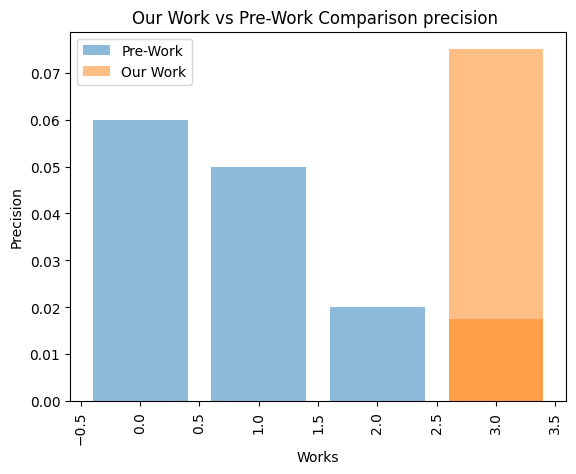

In [ ]:
import matplotlib.pyplot as plt

# Set the values for pre_Work and my_work
pre_Work = [0.06, 0.05, 0.02]
my_work = [0.075,0.0175]

# Create a new figure and axis
fig, ax = plt.subplots()

# Set the x-axis labels and positions
x_labels = ['pre_Work1LURA', 'pre_Work2', 'pre_Work3']
x_pos = range(len(pre_Work))

# Plot the bars for pre_Work and my_work
ax.bar(x_pos, pre_Work, align='center', alpha=0.5, label='Pre-Work')
ax.bar(len(pre_Work), my_work, align='center', alpha=0.5, label='Our Work')

# Add labels and title to the graph
ax.set_ylabel('Precision')
ax.set_xlabel('Works')
ax.set_title('Our Work vs Pre-Work Comparison precision ')

# Rotate the x-axis labels by 90 degrees and move the legend to the top right
plt.xticks(rotation=90)
ax.legend(loc='upper left')

# Show the graph
plt.show()


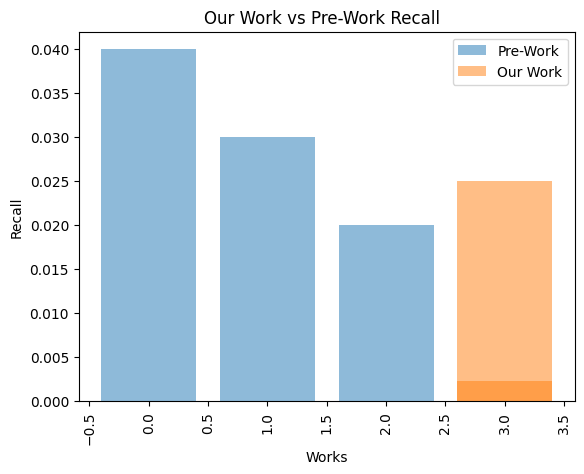

In [ ]:
import matplotlib.pyplot as plt

# Set the values for pre_Work and my_work
pre_Work = [0.04, 0.03, 0.02]
my_work = [0.025,0.002247519655031572]

# Create a new figure and axis
fig, ax = plt.subplots()

# Set the x-axis labels and positions
x_labels = ['pre_Work1LURA', 'pre_Work2', 'pre_Work3']
x_pos = range(len(pre_Work))

# Plot the bars for pre_Work and my_work
ax.bar(x_pos, pre_Work, align='center', alpha=0.5, label='Pre-Work')
ax.bar(len(pre_Work), my_work, align='center', alpha=0.5, label='Our Work')

# Add labels and title to the graph
ax.set_ylabel('Recall')
ax.set_xlabel('Works')
ax.set_title('Our Work vs Pre-Work Recall  ')

# Rotate the x-axis labels by 90 degrees and move the legend to the top right
plt.xticks(rotation=90)
ax.legend(loc='upper right')

# Show the graph
plt.show()


Eventhough our work's precision may seem good than previous works ,We should know that at last we calculated accuracy where weights are moved from actual values.Also we filtered out many users data during preprocessinf and took only top users. So saying our work is superior than previous is completely wrong.Also we recommend adding other recomenders also in it while calculating weights, so that precision will increase.

GRaphs with R1 and R2 precision and recall


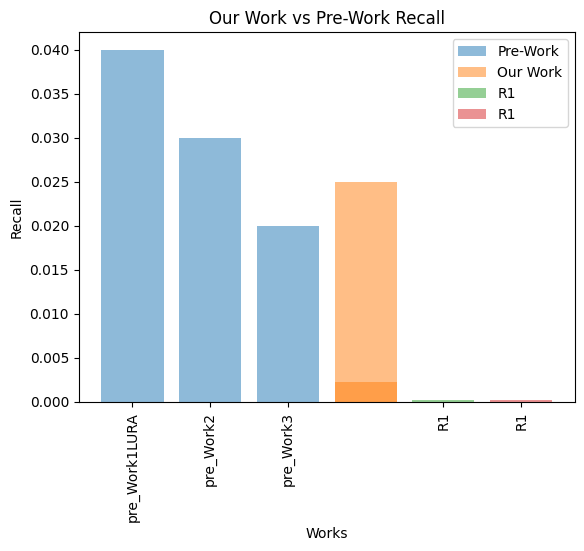

In [ ]:
import matplotlib.pyplot as plt

# Set the values for pre_Work, my_work, and R1_work
pre_Work = [0.04, 0.03, 0.02]
my_work = [0.025, 0.002247519655031572]
R1_work = [0.0001772505029409667, 0.00017813388300379793]

# Create a new figure and axis
fig, ax = plt.subplots()

# Set the x-axis labels and positions
x_labels = ['pre_Work1LURA', 'pre_Work2', 'pre_Work3']
x_pos = range(len(pre_Work))

# Plot the bars for pre_Work, my_work, and R1_work
ax.bar(x_pos, pre_Work, align='center', alpha=0.5, label='Pre-Work')
ax.bar(len(pre_Work), my_work, align='center', alpha=0.5, label='Our Work')
ax.bar(len(pre_Work)+1, R1_work[0], align='center', alpha=0.5, label='R1')
ax.bar(len(pre_Work)+2, R1_work[1], align='center', alpha=0.5, label='R1')

# Add labels and title to the graph
ax.set_ylabel('Recall')
ax.set_xlabel('Works')
ax.set_title('Our Work vs Pre-Work Recall')

# Set the x-axis tick positions and labels
new_x_pos = list(x_pos) + [len(pre_Work)+1, len(pre_Work)+2]
new_x_labels = x_labels + ['R1', 'R1']
plt.xticks(new_x_pos, new_x_labels, rotation=90)

# Move the legend to the top right
ax.legend(loc='upper right')

# Show the graph
plt.show()


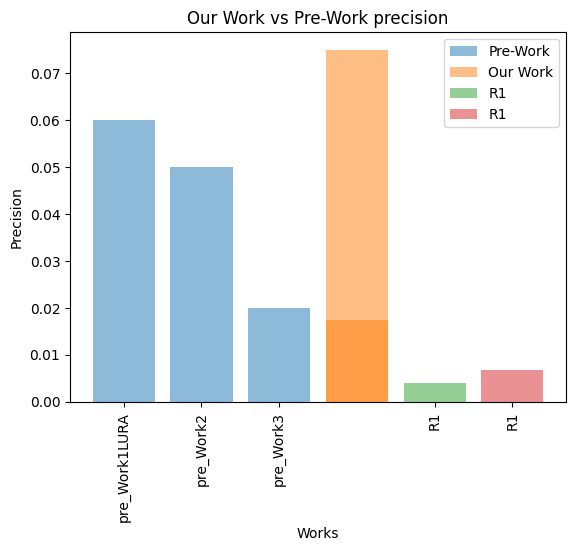

In [ ]:
import matplotlib.pyplot as plt

# Set the values for pre_Work, my_work, and R1_work
pre_Work = [0.06, 0.05, 0.02]
my_work = [0.075,0.0175]
R1_work = [0.004054054054054054, 0.006756756756756757]


# Create a new figure and axis
fig, ax = plt.subplots()

# Set the x-axis labels and positions
x_labels = ['pre_Work1LURA', 'pre_Work2', 'pre_Work3']
x_pos = range(len(pre_Work))

# Plot the bars for pre_Work, my_work, and R1_work
ax.bar(x_pos, pre_Work, align='center', alpha=0.5, label='Pre-Work')
ax.bar(len(pre_Work), my_work, align='center', alpha=0.5, label='Our Work')
ax.bar(len(pre_Work)+1, R1_work[0], align='center', alpha=0.5, label='R1')
ax.bar(len(pre_Work)+2, R1_work[1], align='center', alpha=0.5, label='R1')

# Add labels and title to the graph
ax.set_ylabel('Precision')
ax.set_xlabel('Works')
ax.set_title('Our Work vs Pre-Work precision')

# Set the x-axis tick positions and labels
new_x_pos = list(x_pos) + [len(pre_Work)+1, len(pre_Work)+2]
new_x_labels = x_labels + ['R1', 'R1']
plt.xticks(new_x_pos, new_x_labels, rotation=90)

# Move the legend to the top right
ax.legend(loc='upper right')

# Show the graph
plt.show()
